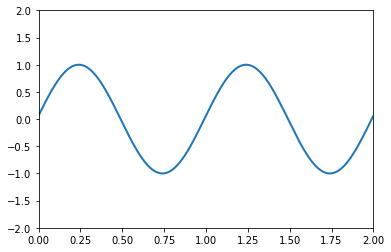

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

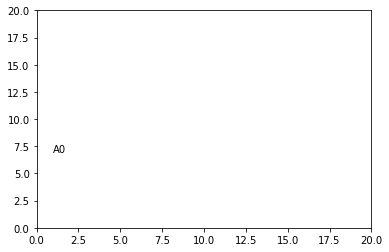

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create initial data
data = np.array([[1,2,3,4,5], [7,4,9,2,3]])

# Create figure and axes
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))

# Create initial objects
line, = ax.plot([], [], 'r-')
annotation = ax.annotate('A0', xy=(data[0][0], data[1][0]))
annotation.set_animated(True)

# Create the init function that returns the objects
# that will change during the animation process
def init():
    return line, annotation

# Create the update function that returns all the
# objects that have changed
def update(num):
    newData = np.array([[1 + num, 2 + num / 2, 3, 4 - num / 4, 5 + num],
                        [7, 4, 9 + num / 3, 2, 3]])
    line.set_data(newData)
    # This is not working i 1.2.1
    # annotation.set_position((newData[0][0], newData[1][0]))
    annotation.xytext = (newData[0][0], newData[1][0])
    return line, annotation

anim = animation.FuncAnimation(fig, update, frames=25, init_func=init,
                               interval=200, blit=True)
plt.show()

C:\Users\Larry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


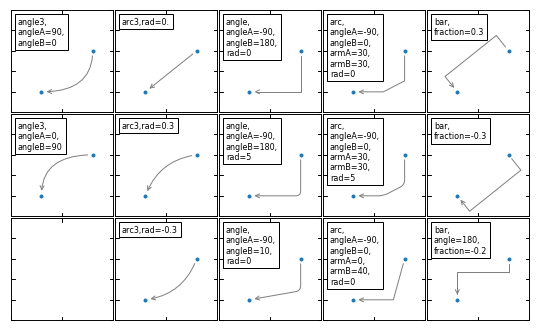

In [5]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(1, figsize=(8,5))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (3, 5), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)


x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7


def demo_con_style(ax, connectionstyle, label=None):

    if label is None:
        label = connectionstyle

    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    add_at(ax, label, loc=2)

column = grid.axes_column[0]

demo_con_style(column[0], "angle3,angleA=90,angleB=0",
               label="angle3,\nangleA=90,\nangleB=0")
demo_con_style(column[1], "angle3,angleA=0,angleB=90",
               label="angle3,\nangleA=0,\nangleB=90")



column = grid.axes_column[1]

demo_con_style(column[0], "arc3,rad=0.")
demo_con_style(column[1], "arc3,rad=0.3")
demo_con_style(column[2], "arc3,rad=-0.3")



column = grid.axes_column[2]

demo_con_style(column[0], "angle,angleA=-90,angleB=180,rad=0",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=0")
demo_con_style(column[1], "angle,angleA=-90,angleB=180,rad=5",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=5")
demo_con_style(column[2], "angle,angleA=-90,angleB=10,rad=5",
               label="angle,\nangleA=-90,\nangleB=10,\nrad=0")


column = grid.axes_column[3]

demo_con_style(column[0], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=0")
demo_con_style(column[1], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=5")
demo_con_style(column[2], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=0,\narmB=40,\nrad=0")


column = grid.axes_column[4]

demo_con_style(column[0], "bar,fraction=0.3",
               label="bar,\nfraction=0.3")
demo_con_style(column[1], "bar,fraction=-0.3",
               label="bar,\nfraction=-0.3")
demo_con_style(column[2], "bar,angle=180,fraction=-0.2",
               label="bar,\nangle=180,\nfraction=-0.2")


#demo_con_style(column[1], "arc3,rad=0.3")
#demo_con_style(column[2], "arc3,rad=-0.3")


grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid.axes_llc.axis["bottom"].toggle(ticklabels=False)
grid.axes_llc.axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()
